## Password Strength Prediction using Support Vector Machine (SVM)

In today's digital age, ensuring the security of online accounts is of paramount importance. One crucial aspect of account security is creating strong and secure passwords. Weak passwords can leave individuals vulnerable to various cyber threats, such as hacking and data breaches. To address this issue, machine learning techniques can be employed to predict the strength of passwords and provide users with feedback on their password choices.

This notebook presents a Python-based solution for password strength prediction using a Support Vector Machine (SVM) classifier. SVM is a powerful machine learning algorithm that can classify data points into different categories, making it well-suited for this task. The code utilizes various libraries and techniques to preprocess the data, train the SVM model, and provide users with the ability to check the strength of a password interactively.

## Dataset
https://www.kaggle.com/datasets/utkarshx27/passwords

**Key Steps in the Notebook:**

1. **Importing Dependencies:** The code starts by importing essential libraries such as NumPy, Pandas, Matplotlib, Seaborn, and scikit-learn's tools for text vectorization and SVM classification.

2. **Loading Dataset:** It loads a dataset named "passwords.csv," presumably containing password samples and their corresponding strength labels.

3. **Initial Exploration and Cleaning:** This section explores the dataset, checking for its dimensions, missing values, and distribution of password strengths. It visualizes the distribution using a countplot to gain insights into the data.

4. **Machine Learning:**

    - **Test Train Split:** The dataset is divided into training and testing sets to evaluate the model's performance accurately.

    - **Vectorization:** Passwords are vectorized using the Term Frequency-Inverse Document Frequency (TF-IDF) representation, a common technique for text data.

    - **Parameters (Defining and Searching):** The code defines a parameter grid for grid search to find the best hyperparameters for the SVM model. Grid search is performed to optimize the model's performance.

    - **Training and Testing:** The SVM classifier is trained with the best hyperparameters obtained from grid search. Predictions are made on the test set, and accuracy is calculated to evaluate model performance. A confusion matrix is also visualized to assess classification results.

5. **Interactive Password Strength Prediction:** The notebook concludes by providing an interactive component where users can input a password, and the trained SVM model predicts its strength as either "Strong password" or "Weak password" based on the learned patterns from the dataset.

By following this notebook, users can gain insights into password strength prediction and use the SVM model to assess the security of their passwords. This project serves as a valuable tool for promoting better password practices and enhancing online security.


# Importing Dependencies

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix

# Loading Dataset

In [ ]:
# Load the dataset
data = pd.read_csv("passwords.csv")

# Initial Exploration and Cleaning

In [ ]:
df.head()

In [ ]:
# shape
df.shape

In [ ]:
# info
df.info()

In [ ]:
# describe
df.describe()

In [ ]:
# Remove rows with missing values in the "password" column
data = data.dropna(subset=["password"])

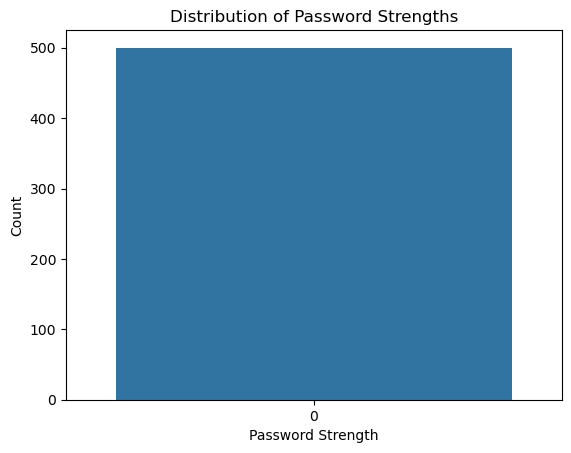

In [ ]:
# Explore the distribution of password strengths
sns.countplot(data["strength"])
plt.xlabel("Password Strength")
plt.ylabel("Count")
plt.title("Distribution of Password Strengths")
plt.show()

# Macine Learning

## Test Train Split

In [ ]:
# Split the data into input features (X) and target variable (y)
X = data["password"]
y = data["strength"]

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Vectorization

In [ ]:
# Vectorize the passwords using TF-IDF representation
vectorizer = TfidfVectorizer(analyzer="char")
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

## Parameters (Defining and Searching)

In [ ]:
# Define the parameter grid for grid search
param_grid = {
    "C": [0.1, 1, 10],
    "gamma": [0.1, 1, 10]
}

In [ ]:
# Perform grid search to find the best hyperparameters
grid_search = GridSearchCV(SVC(kernel="rbf", random_state=42), param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)
best_params = grid_search.best_params_

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


## Training and Testing

In [ ]:
# Create and train the SVM classifier with the best hyperparameters
model = SVC(kernel="rbf", **best_params, random_state=42)
model.fit(X_train_tfidf, y_train)

SVC(C=10, gamma=0.1, random_state=42)

In [ ]:
# Make predictions on the test set
predictions = model.predict(X_test_tfidf)

In [ ]:
# Calculate accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.37


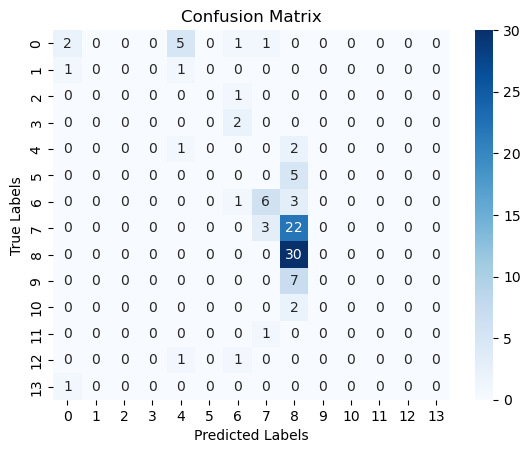

In [ ]:
# Visualize the confusion matrix
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
# Prompt the user to enter a password for classification
password_to_check = input("Enter a password: ")

Enter a password:  123456


In [ ]:
# Vectorize the input password using the trained vectorizer
password_vector = vectorizer.transform([password_to_check])

In [ ]:
# Predict the strength of the input password
prediction = model.predict(password_vector)[0]

In [ ]:
# Print the predicted strength of the password
if prediction == 1:
    print("Strong password.")
else:
    print("Weak password.")

Weak password.
